In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sns 


table_2 = pd.read_csv('2_column.csv')
table_3 = pd.read_csv('3_column.csv')

class Klobczak:
    def __init__(self, cube_size = 10000, tables = [], p_table = []):
        self.cube_size = cube_size
        self.tables = tables
        self.p_table = p_table


    def split(self, table):
        split_axis = self.find_split_axis(table)
        element_count = table.A.count()

        median = np.median(table[split_axis])
        split_table1 = table[table[split_axis] >= median]
        split_table2 = table[table[split_axis] < median]

        if(element_count> self.cube_size):
            self.split(split_table1)
            self.split(split_table2)
        else:
            self.tables.append(table)


    def find_split_axis(self, table):
        greatest_variance = 0
        for col in table.columns:
            variance = table[col].var()
            if(variance > greatest_variance): 
                greatest_variance = variance
                split_axis = col
        return split_axis


    def draw_2d(self):
        x_min = self.p_table.A.min()
        x_max = self.p_table.A.max()
        y_min = self.p_table.B.min()
        y_max = self.p_table.B.max()

        fig, ax = plt.subplots()
        for tab in self.tables:
            ax.add_artist(mpatch.Rectangle((tab.A.min(), tab.B.min()), 
                                         tab.A.max()-tab.A.min(), tab.B.max()-tab.B.min(), fill = None))
        ax.set_xlim((x_min, x_max))
        ax.set_ylim((y_min, y_max))
        plt.show()

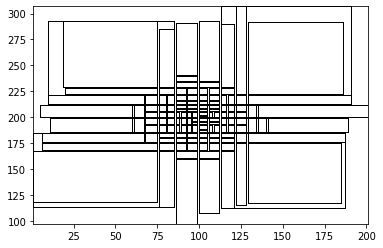

10000
8481
9091
7637
8889
7630
7556
7214
9785
8176
7773
7438
7980
7385
7262
7042
9689
8118
7570
7322
7843
7518
7388
7134
8374
7035
8150
6469
8271
6496
9310
4730
5230
5070
8580
8529
7412
8585
8251
7320
7241
9413
7913
8480
7096
8613
6740
7304
6534
9387
7739
9320
6739
8349
6831
8534
5670
8909
6968
8372
6634
7406
6981
7041
6241
5239
5158
8590
8540
7515
8614
8275
7442
7344
9619
7937
8422
7201
8653
6836
7341
6688
9742
7232
9178
6832
8228
6788
8468
5836
8711
6894
8443
6618
7662
6941
7093
6124
6128
4450
7878
9513
6888
9942
6774
8569
5974
9609
7733
8539
6875
8353
7302
7580
6468
9734
7770
8550
6910
8202
7284
7627
6507
9003
7217
7661
6910
7492
6849
6993
6324
66498
62841
62582
58835
66218
62093
62569
58552
66717
62697
62304
58486
66116
62459
62584
58449
10000
8481
9091
7637
8889
7630
7556
7214
9785
8176
7773
7438
7980
7385
7262
7042
9689
8118
7570
7322
7843
7518
7388
7134
8374
7035
8150
6469
8271
6496
9310
4730
5230
5070
8580
8529
7412
8585
8251
7320
7241
9413
7913
8480
7096
8613
6740
7304
6534
93

In [6]:
k = Klobczak(100000, p_table = table_2)
k.split(table_2)
k.draw_2d()
for item in k.tables:
    #self.assertTrue(self.k.cube_size*0.9 < item.A.count() < self.k.cube_size*1.2)
    print(item.A.count())